In [3]:
import pandas as pd
import numpy as np

In [4]:
import tensorflow as tf
import keras

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import matplotlib.pyplot as plt

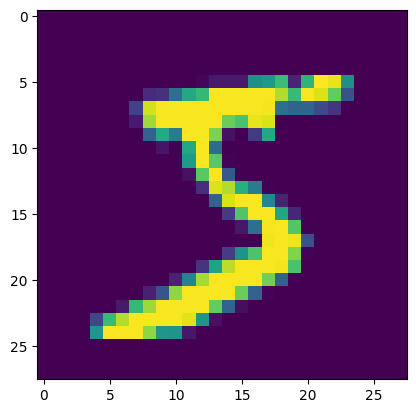

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train = x_train / 255.
x_test = x_test / 255.

In [14]:
x_valid, x_train, y_valid, y_train = x_train[:5000], x_train[5000:], y_train[:5000], y_train[5000:]

In [15]:
x_valid.shape, x_train.shape, y_valid.shape, y_train.shape 

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

2023-03-10 00:42:37.467913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:42:37.473466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:42:37.473697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 00:42:37.516051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']) #SGD = stochastic gradient descent

In [20]:
model_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,y_valid))

Epoch 1/30


2023-03-10 00:42:44.896883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-10 00:42:45.101365: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1d581e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-10 00:42:45.101440: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-03-10 00:42:46.925468: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 11s 4ms/step - loss: 0.7047 - accuracy: 0.8057 - val_loss: 0.3237 - val_accuracy: 0.9112
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3086 - accuracy: 0.9116 - val_loss: 0.2551 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2565 - accuracy: 0.9257 - val_loss: 0.2189 - val_accuracy: 0.9376
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2226 - accuracy: 0.9365 - val_loss: 0.1970 - val_accuracy: 0.9464
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1973 - accuracy: 0.9438 - val_loss: 0.1766 - val_accuracy: 0.9514
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1771 - accuracy: 0.9495 - val_loss: 0.1648 - val_accuracy: 0.9550
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9544 - val_loss: 0.1516 - val_accuracy: 0.9572
Ep

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9716


[0.08809235692024231, 0.9715999960899353]

In [22]:
x_new = x_test[:3]

In [23]:
y_proba = model.predict(x_new)
y_swq = y_proba.round(2)

1/1 [==============================] - 0s 60ms/step


In [24]:
y_swq

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
test_classes = np.argmax(y_swq, axis=1)

In [26]:
test_classes

array([7, 2, 1])

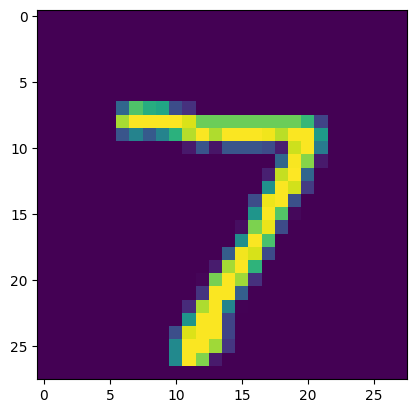

In [27]:
plt.imshow(x_new[0])

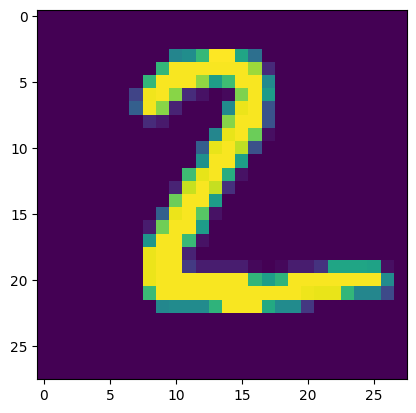

In [28]:
plt.imshow(x_new[1])

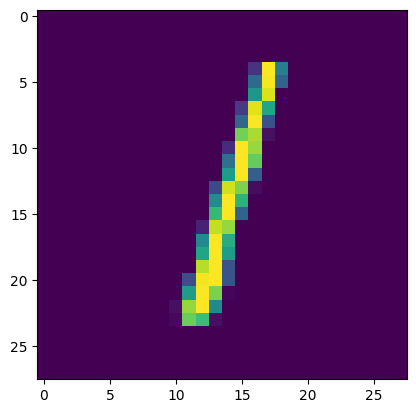

In [29]:
plt.imshow(x_new[2])